In [1]:
import pandas as pd
import numpy as np
from modules.util import load_result_df
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
results = load_result_df(r'data/f1_60.csv')


In [3]:
results.round(6)
results = results[results.AccuracyChange < 0].reset_index(drop = True)

In [4]:
results['DistMetric'].mean()

5.8949362336801485

In [5]:
results.AccuracyChange = results.AccuracyChange.abs()
results.F1MacroChange = results.F1MacroChange.abs()
results.HomophilyChange = results.HomophilyChange.abs()

In [6]:
#df_ar = results[(results.AddRatio == 0.05) & (results.RemoveRatio == 0.05)].reset_index(drop = True)
#df_a = results[(results.AddRatio == 0.1) & (results.RemoveRatio == 0)].reset_index(drop = True)
#df_r = results[(results.AddRatio == 0) & (results.RemoveRatio == 0.1)].reset_index(drop = True)
df_ar = results[(results.PerturbType == 'addremove')].reset_index(drop = True)
df_a = results[(results.PerturbType == 'add')].reset_index(drop = True)
df_r = results[(results.PerturbType == 'remove')].reset_index(drop = True)


In [7]:
df_a[['AccuracyChange', 'F1MacroChange','DegreeMetric', 'DistMetric', 'HomophilyChange']].describe()

,AccuracyChange,F1MacroChange,DegreeMetric,DistMetric,HomophilyChange
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,7.039524,8.098645,4.076709,6.309362,30.013247
std,0.821927,0.978658,0.032441,0.028902,0.319158
min,4.498712,4.951334,3.956311,6.216213,29.136246
25%,6.491004,7.373048,4.057586,6.289195,29.785541
50%,7.069417,8.074193,4.082043,6.310148,29.996940
75%,7.583544,8.793439,4.100317,6.329722,30.223438
max,9.447303,10.928898,4.148277,6.403425,31.099231


<AxesSubplot: xlabel='AddRatio', ylabel='AccuracyChange'>

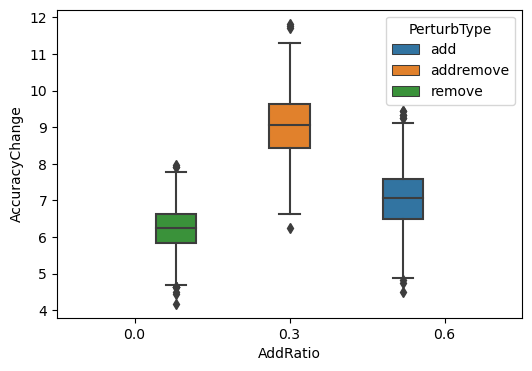

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x='AddRatio', y='AccuracyChange', hue='PerturbType', data=results, ax=ax)


Text(0.5, 0.98, 'Accuracy Change (Budget = 80%)')

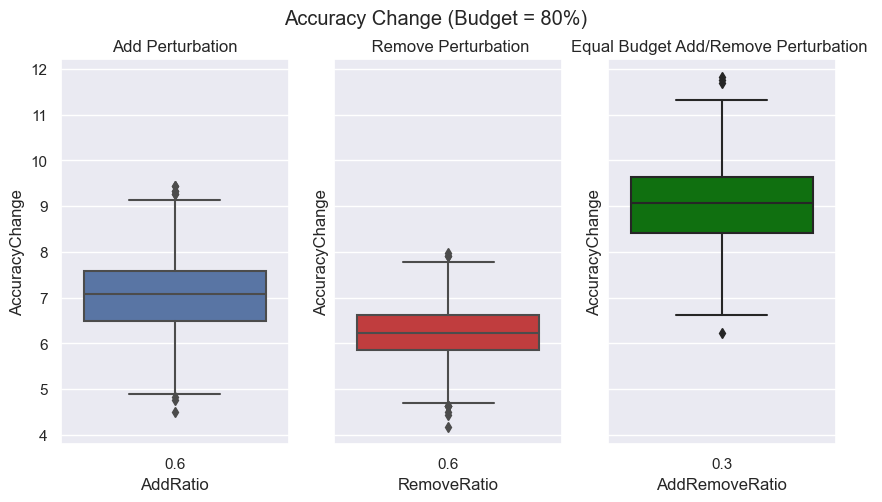

In [12]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax =plt.subplots(1,3, sharey = True)
sns.boxplot(data=df_ar, x="AddRatio", y = 'AccuracyChange', ax = ax[2], color = 'green').set(title = 'Equal Budget Add/Remove Perturbation ')

sns.boxplot(data=df_r, x="RemoveRatio", y = 'AccuracyChange', ax = ax[1], color = 'tab:red').set(title = ' Remove Perturbation')
sns.boxplot(data=df_a, x="AddRatio", y = 'AccuracyChange', ax = ax[0], color = 'b').set(title = 'Add Perturbation')
ax[2].set_xlabel('AddRemoveRatio')
fig.suptitle('Accuracy Change (Budget = 80%)')

Text(0.5, 0.98, '|F1 Macro Change| (Budget = 80%)')

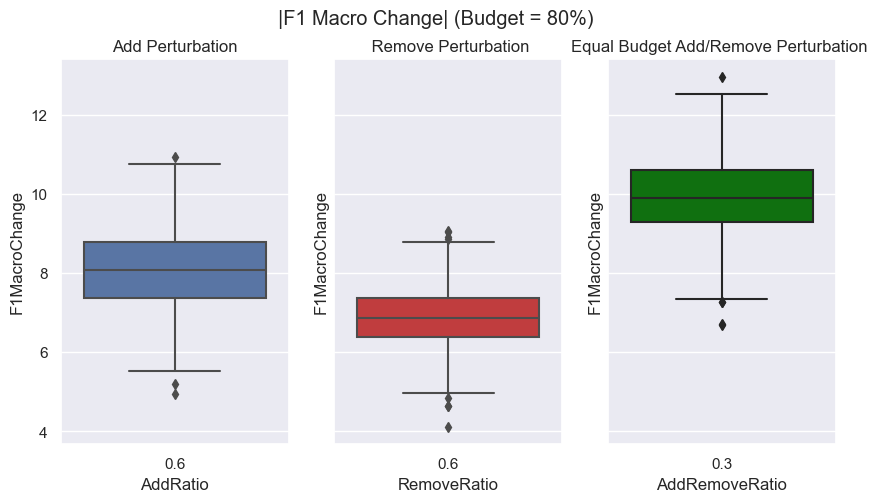

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax =plt.subplots(1,3, sharey = True)
sns.boxplot(data=df_ar, x="AddRatio", y = 'F1MacroChange', ax = ax[2], color = 'green').set(title = 'Equal Budget Add/Remove Perturbation ')

sns.boxplot(data=df_r, x="RemoveRatio", y = 'F1MacroChange', ax = ax[1], color = 'tab:red').set(title = ' Remove Perturbation')
sns.boxplot(data=df_a, x="AddRatio", y = 'F1MacroChange', ax = ax[0], color = 'b').set(title = 'Add Perturbation')
ax[2].set_xlabel('AddRemoveRatio')
fig.suptitle('|F1 Macro Change| (Budget = 80%)')

Text(0, 0.5, 'Distribution Metric')

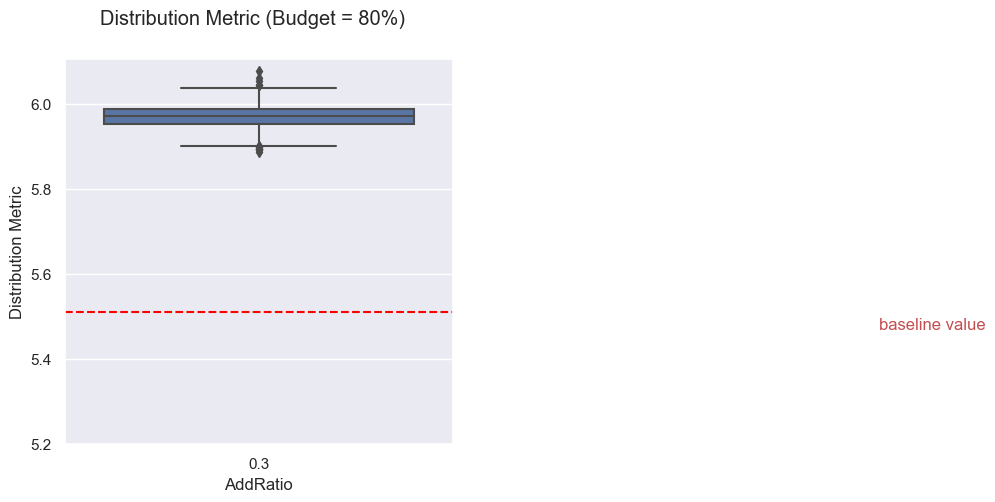

In [20]:
sns.set(rc={'figure.figsize':(5,5)})
fig, ax =plt.subplots(1)
fig.suptitle('Distribution Metric (Budget = 80%)')
g = sns.boxplot(data=df_ar, x="AddRatio", y = 'DistMetric', ax = ax, )
g.axhline(5.51, color = 'red', linestyle = '--')
ax.set_ylim(5.2,)
ax.text(1.6,5.47, 'baseline value', color = 'r')
ax.set_ylabel('Distribution Metric')



In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
fig, ax =plt.subplots(1)
fig.suptitle('Degree Metric (Budget = 80%)')
g = sns.boxplot(data=results, x="PerturbType", y = 'DegreeMetric', ax = ax, order=["add", "remove", "addremove"],palette = my_pal)
ax.set_ylabel('Degree Metric')
g.axhline(4.08, color = 'red', linestyle = '--')
ax.set_ylim(min(df_a.DegreeMetric)*0.98,)
ax.text(1.5,4.05, 'baseline value', color = 'r')

Text(1.5, 4.05, 'baseline value')

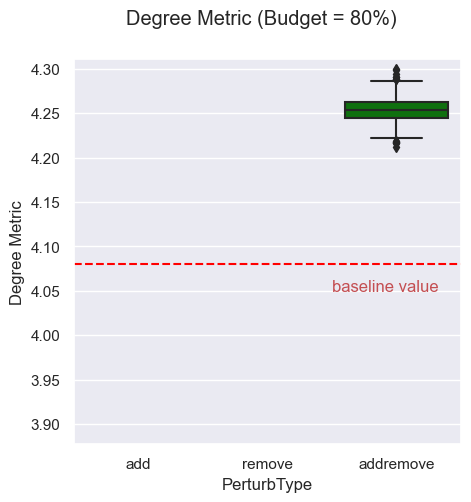

In [16]:
sns.set(rc={'figure.figsize':(5,5)})
fig, ax =plt.subplots(1)
fig.suptitle('Degree Metric (Budget = 80%)')
g = sns.boxplot(data=df_ar, x="", y = 'DegreeMetric', ax = ax, order=["add", "remove", "addremove"],palette = my_pal)
ax.set_ylabel('Degree Metric')
g.axhline(4.08, color = 'red', linestyle = '--')
ax.set_ylim(min(df_a.DegreeMetric)*0.98,)
ax.text(1.5,4.05, 'baseline value', color = 'r')



Text(1.5, 79.5, 'baseline value')

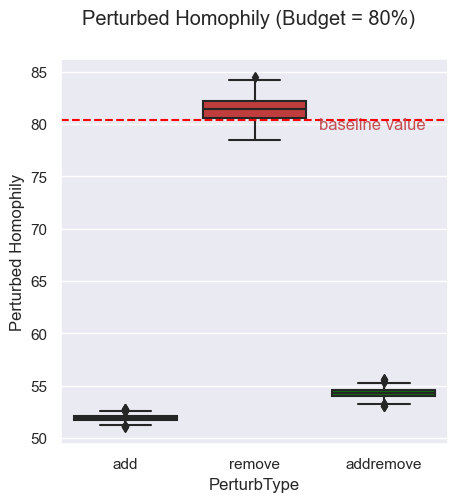

In [99]:
sns.set(rc={'figure.figsize':(5,5)})
fig, ax =plt.subplots(1)
fig.suptitle('Perturbed Homophily (Budget = 80%)')
g = sns.boxplot(data=results, x="PerturbType", y = 'PerturbedHomophily', ax = ax, order=["add", "remove", "addremove"],palette = my_pal)
ax.set_ylabel('Perturbed Homophily')
g.axhline(80.41, color = 'red', linestyle = '--')

ax.text(1.5,79.5, 'baseline value', color = 'r')


The average of the minimum distance between each node pair for a perturbed edge pair is higher for 
random edge removal than addition and equal budget addremove.

The average of the average distance between each node pair for a perturbed edge pair is however lower 
for random edge removal than addition and equal budget addremove

Difference between the two metrics show that the all node pairs in perturbed edge pairs vary little.
Compared to random addition where the minimum node pair distance is considerably lower than the average.



The degree metric for random removal is expected to be higher due to the nature of the perturbation. 

Random removal requires the nodes involved in the perturbation to have more than one edge, whereas random addition does not have this prerequisite.

Should we consider perturbed nodes with degrees higher than 1 only to have an accurate comparison?

Text(0, 0.5, '|F1 Macro Change| (%)')

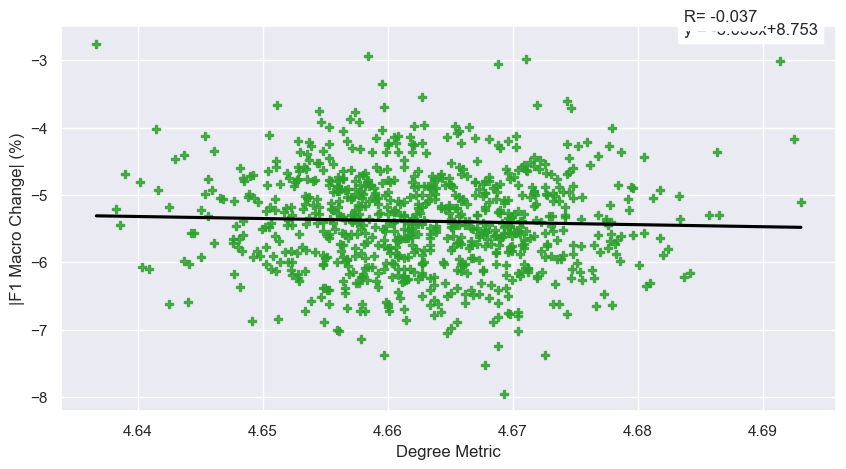

In [9]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax =plt.subplots(1)

df_p = df_r

slope, intercept, r_value, pv, se = stats.linregress(df_p['DegreeMetric'],df_p['F1MacroChange'])

sns.regplot(x="DegreeMetric", y="F1MacroChange", data=df_p, 
    ci=None, label="y={0:.1f}x+{1:.1f}".format(slope, intercept), ax = ax, marker = "P", color = 'tab:green', line_kws={"color": "black"})

ax.text(max(df_p['DegreeMetric'])*0.998, max(df_p['F1MacroChange'])*0.95, "y = {0:.3f}x+{1:.3f}".format(slope, intercept), backgroundcolor = 'w')
ax.text(max(df_p['DegreeMetric'])*0.998, max(df_p['F1MacroChange'])*0.88, "R= {0:.3f}".format(r_value), backgroundcolor = 'w')
# fig.suptitle('Random Add/Remove')
ax.set_xlabel('Degree Metric')
ax.set_ylabel('|F1 Macro Change| (%)')

Text(0, 0.5, 'Accuracy Change (%)')

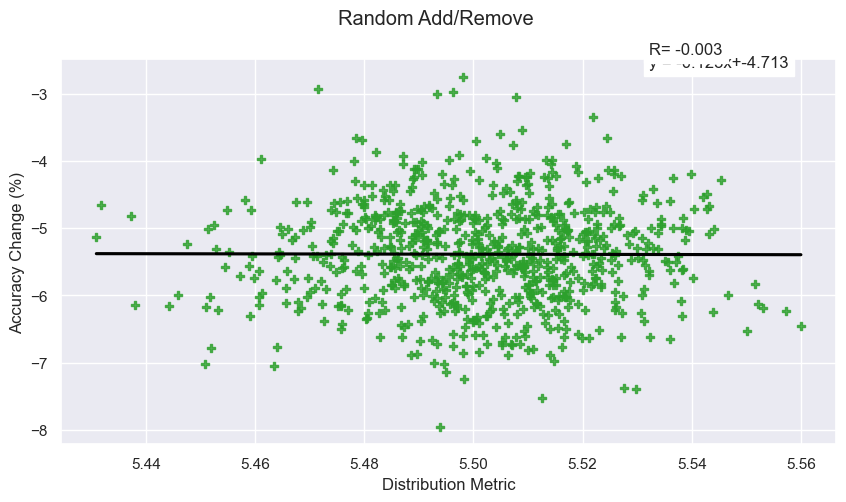

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax =plt.subplots(1)

df_p = df_r

slope, intercept, r_value, pv, se = stats.linregress(df_p['DistMetric'],df_p['F1MacroChange'])

sns.regplot(x="DistMetric", y="F1MacroChange", data=df_p, 
    ci=None, label="y={0:.1f}x+{1:.1f}".format(slope, intercept), ax = ax, marker = "P", color = 'tab:green', line_kws={"color": "black"})

ax.text(max(df_p['DistMetric'])*0.995, max(df_p['F1MacroChange'])*0.95, "y = {0:.3f}x+{1:.3f}".format(slope, intercept), backgroundcolor = 'w')
ax.text(max(df_p['DistMetric'])*0.995, max(df_p['F1MacroChange'])*0.88, "R= {0:.3f}".format(r_value), backgroundcolor = 'w')
fig.suptitle('Random Add/Remove')
ax.set_xlabel('Distribution Metric')
ax.set_ylabel('Accuracy Change (%)')

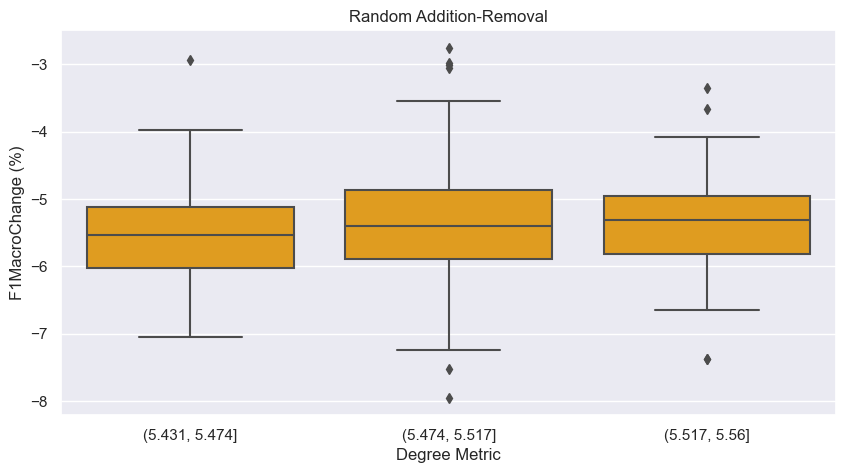

In [17]:

df = df_r
df['bins'] = pd.cut(df['DistMetric'], 3)
df
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, x='bins', y='F1MacroChange', ax=ax, color = 'orange')
ax.tick_params(axis='x')
ax.set_title('Random Addition-Removal')
ax.set_ylabel('F1MacroChange (%)')
ax.set_xlabel('Degree Metric')
plt.show()

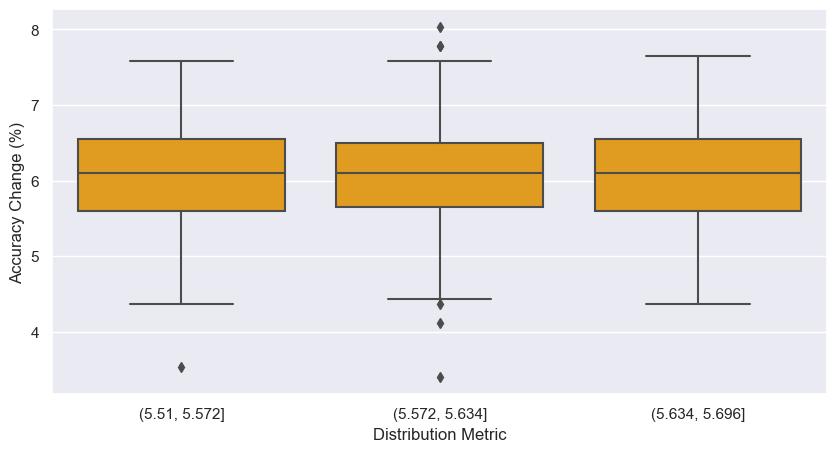

In [355]:

df = df_r
df['bins'] = pd.cut(df['DistMetric'], 3)
df
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, x='bins', y='AccuracyChange', ax=ax, color = 'orange')
ax.tick_params(axis='x')
ax.set_ylabel('Accuracy Change (%)')
ax.set_xlabel('Distribution Metric')
plt.show()